---
# Data Analysis
---
In this notebook, it is the data analysis section.




---
## Results
---




---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data file

In [3]:
df = pd.read_csv('/Users/AlexandreRioux/Desktop/games_comments_clean.csv')
df

,username,rating,comment,gamename,mechanics,min_players,max_players,minplaytime,maxplaytime,age,ratings_avg,count_wanting,count_wishing,description,categories,lang
0,causticforever,NaN,Played prototype- will be an enjoyable way to ...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en
1,Corwin007,NaN,UPCOMING\n\nArk Nova lite?,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en
2,IronTarkles,NaN,New game from ark nova designer,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en
3,MarkyX,NaN,I'm very interested in this one. I like the co...,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en
4,mikamikomi,1.0,3 artist yet still use stock photos? oh yeah,Sanctuary,"Action Queue,Hand Management,Hexagon Grid,Open...",1,5,40,100,12,7.00000,55,569,"In Sanctuary, you will plan and design a moder...","Animals,Environmental,Territory Building",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,chicagometh,4.8,"4...'Not so good, but could play again' by BGG...",Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en
4194,Chris Coyote,NaN,Birthday 2025,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en
4195,Chris_P85,9.0,Played a half Game at Spiel 24,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en
4196,Chutch1035,5.0,I love Feld games and I love Civ games. When I...,Civolution,"Area Movement,Dice Rolling,Events,Hand Managem...",1,4,90,180,14,8.21282,580,4089,"Hello, student beings! The cosmic faculty of t...","Civilization,Dice,Economic,Exploration,Science...",en


In [5]:
df.isna().sum()

username            0
rating           1355
comment             0
gamename            0
mechanics           0
min_players         0
max_players         0
minplaytime         0
maxplaytime         0
age                 0
ratings_avg         0
count_wanting       0
count_wishing       0
description         0
categories          0
lang                0
dtype: int64

In [7]:
df['rating'].isna().mean() * 100

32.2772748928061

In [9]:
df['rating'].dtype

dtype('float64')

### Investigate distribution by rating category

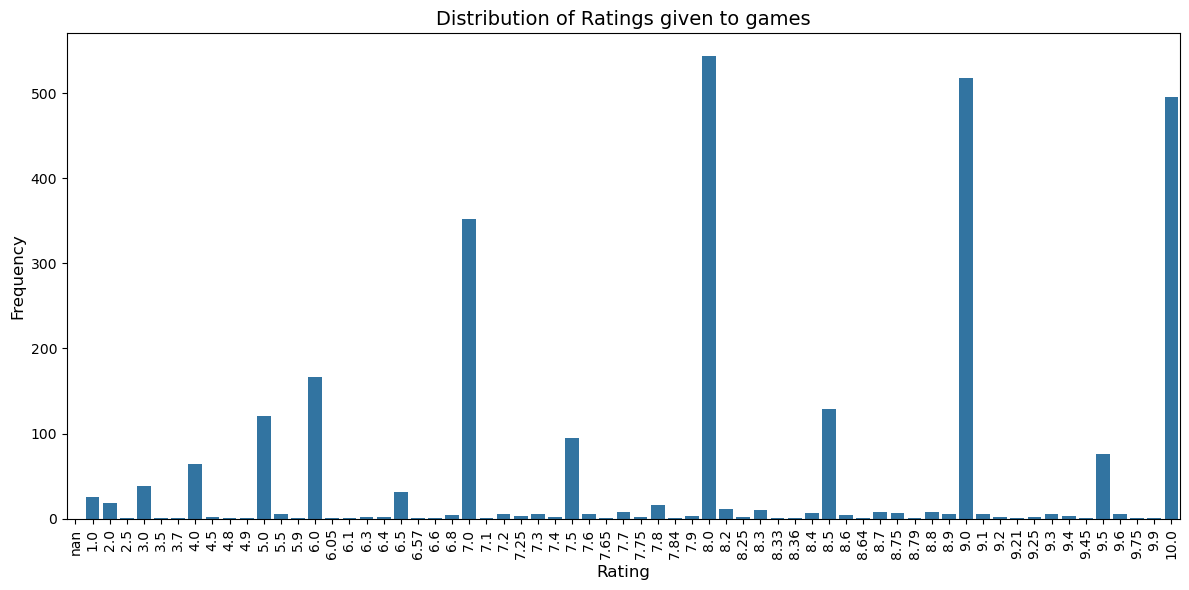

In [12]:
max_rating = df['rating'].max()
min_rating = df['rating'].min()

col = 'rating'

fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x=col, order=sorted(df['rating'].unique()))

# Configuring Plot
ax.set_title('Distribution of Ratings given to games', fontsize=14)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**As expected, ratings vary, and the whole numbers have the highest frequency**

### Investigating Average Rating per Game

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/1040515932.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=game_ratings, x='gamename', y='ratings_avg', palette='viridis')


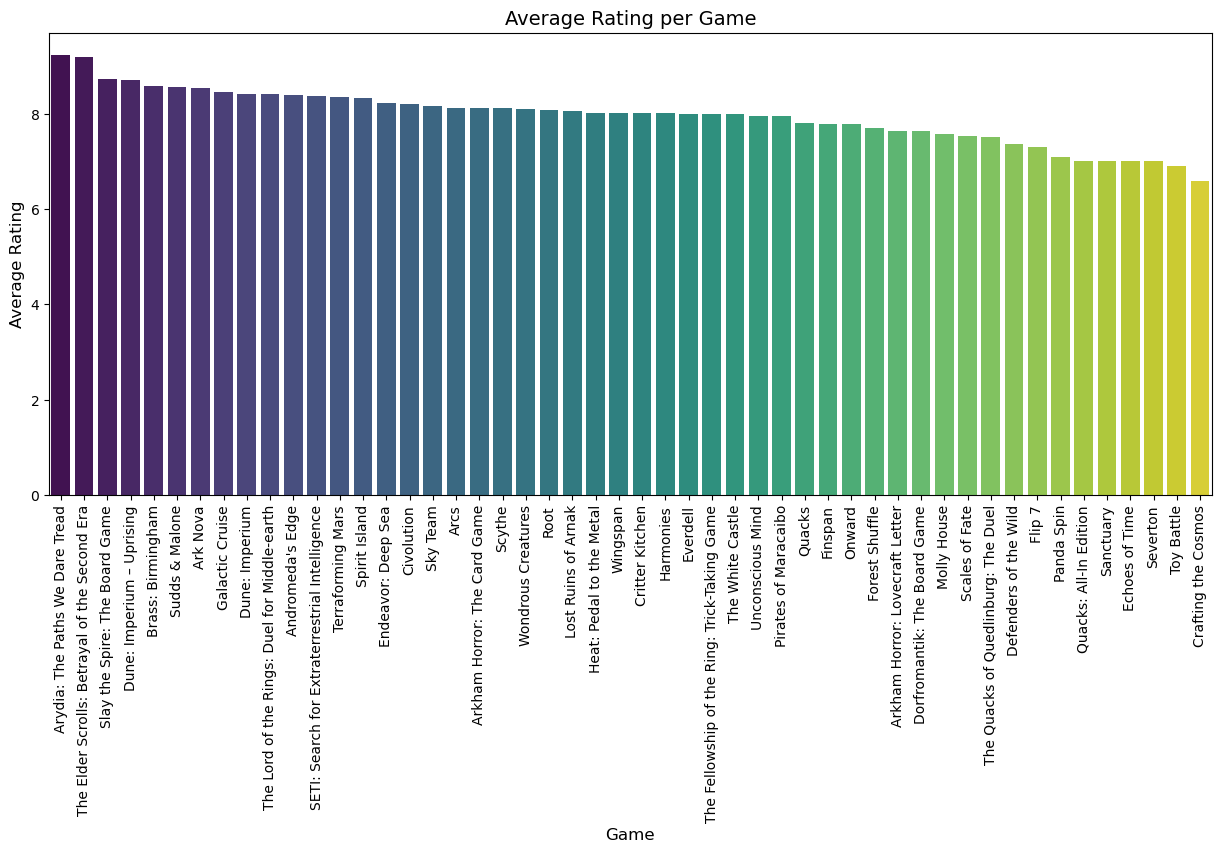

In [18]:
game_ratings = df.groupby('gamename')['ratings_avg'].mean().reset_index()
game_ratings = game_ratings.sort_values(by='ratings_avg', ascending=False)

# Configuring Plot
plt.figure(figsize=(15,6))
sns.barplot(data=game_ratings, x='gamename', y='ratings_avg', palette='viridis')
plt.title('Average Rating per Game', fontsize=14)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Because the nature of out chosen games are among the top rated, it shows that all of these games have high results**

### Investigate distribution by Age


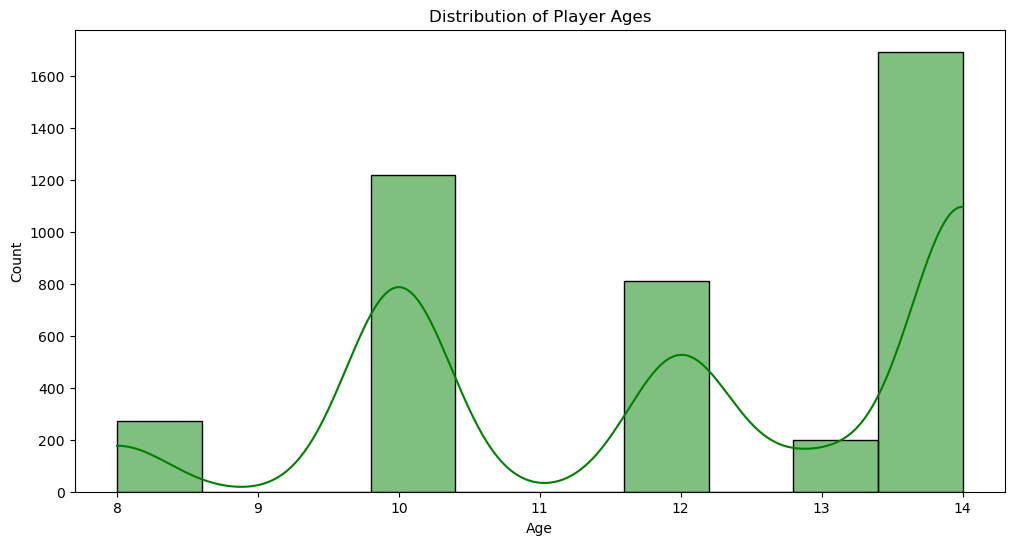

In [22]:
# Configuring Plot
col = 'age'
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', bins=10, color='green', kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Most of these game are recommended for players in late childhood and adolescence.**

### Investigate distribution by # of player


In [26]:
print('Average players in top rated games:', df['max_players'].mean())

Average players in top rated games: 6.371605526441162


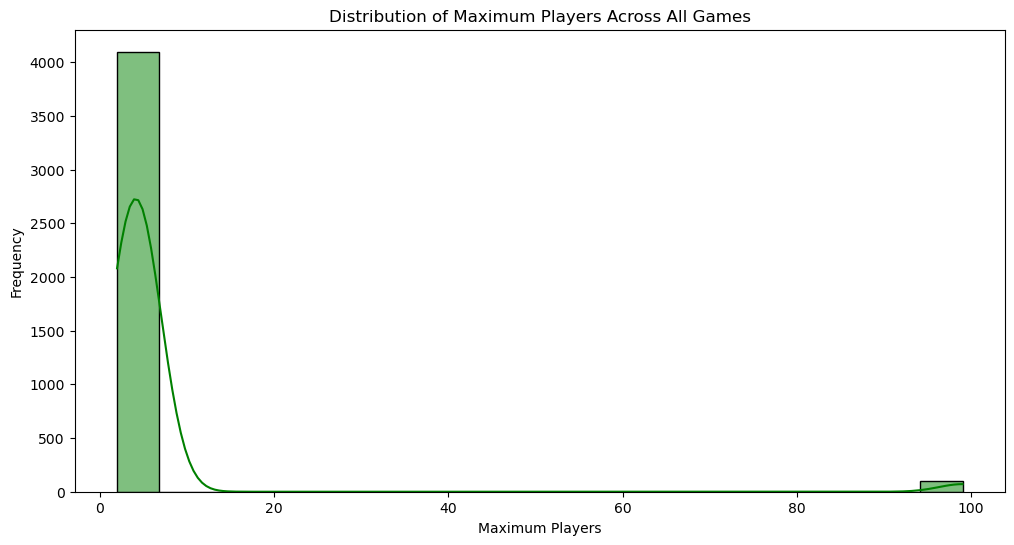

In [28]:
# Configuring Plot
plt.figure(figsize=(12,6))
sns.histplot(df['max_players'], kde=True, bins=20, color='green')
plt.title('Distribution of Maximum Players Across All Games')
plt.xlabel('Maximum Players')
plt.ylabel('Frequency')
plt.show()

In [30]:
print('Highest occurrence of maximum players per game:', df['max_players'].mode())

Highest occurrence of maximum players per game: 0    4
Name: max_players, dtype: int64


### Distribution of Minimum Players per Game

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/2704553719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='gamename', y='min_players', palette='cividis')


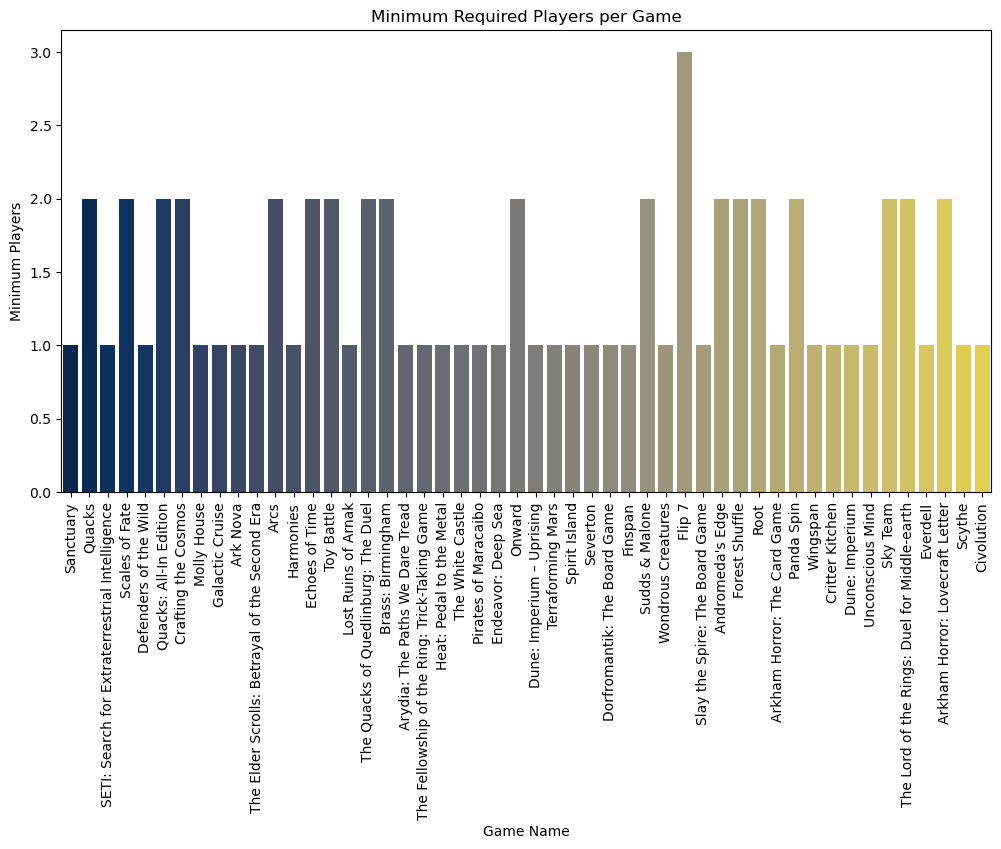

In [38]:
# Configuring Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='gamename', y='min_players', palette='cividis')
plt.title('Minimum Required Players per Game')
plt.ylabel('Minimum Players')
plt.xlabel('Game Name')
plt.xticks(rotation=90)
plt.show()

### Distribution of Maximum Players per Game

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/24671939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='gamename', y='max_players', palette='magma')


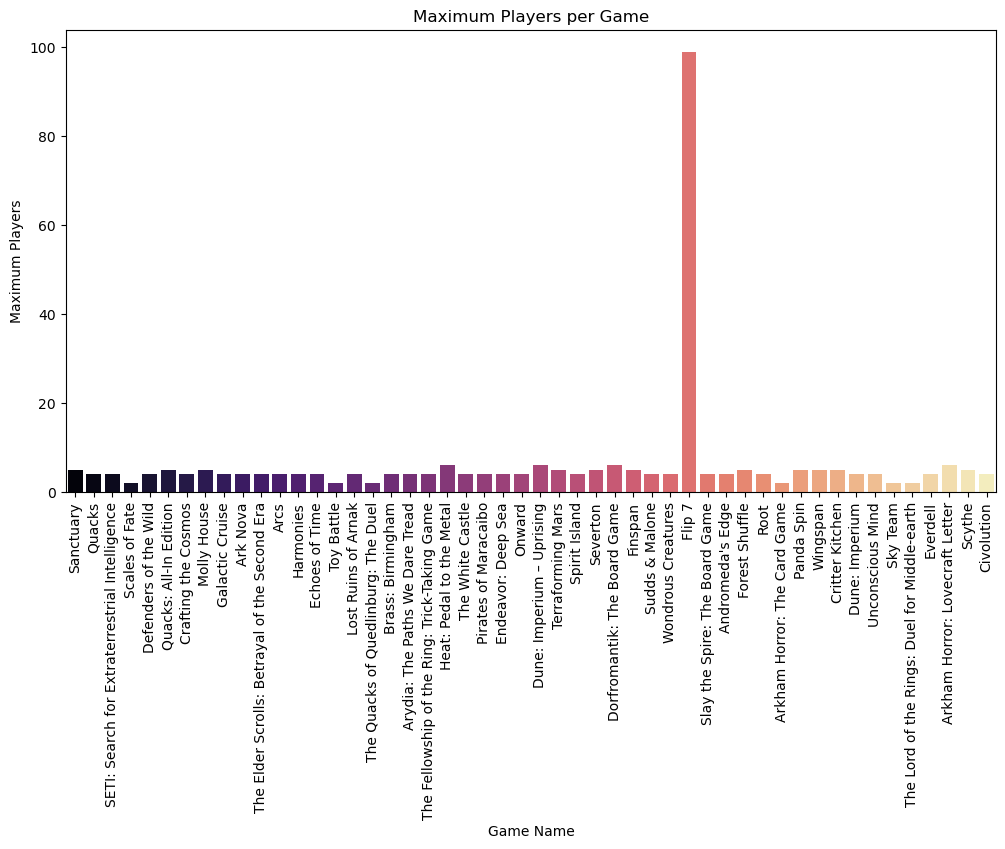

In [36]:
# Configuring Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='gamename', y='max_players', palette='magma')
plt.title('Maximum Players per Game')
plt.xlabel('Game Name')
plt.ylabel('Maximum Players')
plt.xticks(rotation=90)
plt.show()

*Yes, it's true, Flip 7 can accomodate up to 99 players*

### Investigate distribution by Mechanism


In [50]:
# Since this is a string, need to split each result for categorization.
df['mechanics_split'] = df['mechanics'].str.split(',')

# Displaying the first few rows to check the result
print(df[['mechanics', 'mechanics_split']].head())

                                           mechanics  \
0  Action Queue,Hand Management,Hexagon Grid,Open...   
1  Action Queue,Hand Management,Hexagon Grid,Open...   
2  Action Queue,Hand Management,Hexagon Grid,Open...   
3  Action Queue,Hand Management,Hexagon Grid,Open...   
4  Action Queue,Hand Management,Hexagon Grid,Open...   

                                     mechanics_split  
0  [Action Queue, Hand Management, Hexagon Grid, ...  
1  [Action Queue, Hand Management, Hexagon Grid, ...  
2  [Action Queue, Hand Management, Hexagon Grid, ...  
3  [Action Queue, Hand Management, Hexagon Grid, ...  
4  [Action Queue, Hand Management, Hexagon Grid, ...  


In [52]:
# Flatten the lists by exploding the 'mechanics_split' column
df_exploded = df.explode('mechanics_split')

# Displaying the first few rows to check the result
print(df_exploded[['gamename', 'mechanics_split']].head())

    gamename  mechanics_split
0  Sanctuary     Action Queue
0  Sanctuary  Hand Management
0  Sanctuary     Hexagon Grid
0  Sanctuary    Open Drafting
0  Sanctuary   Set Collection


/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/4010425128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_exploded, x='mechanics_split', palette='magma')


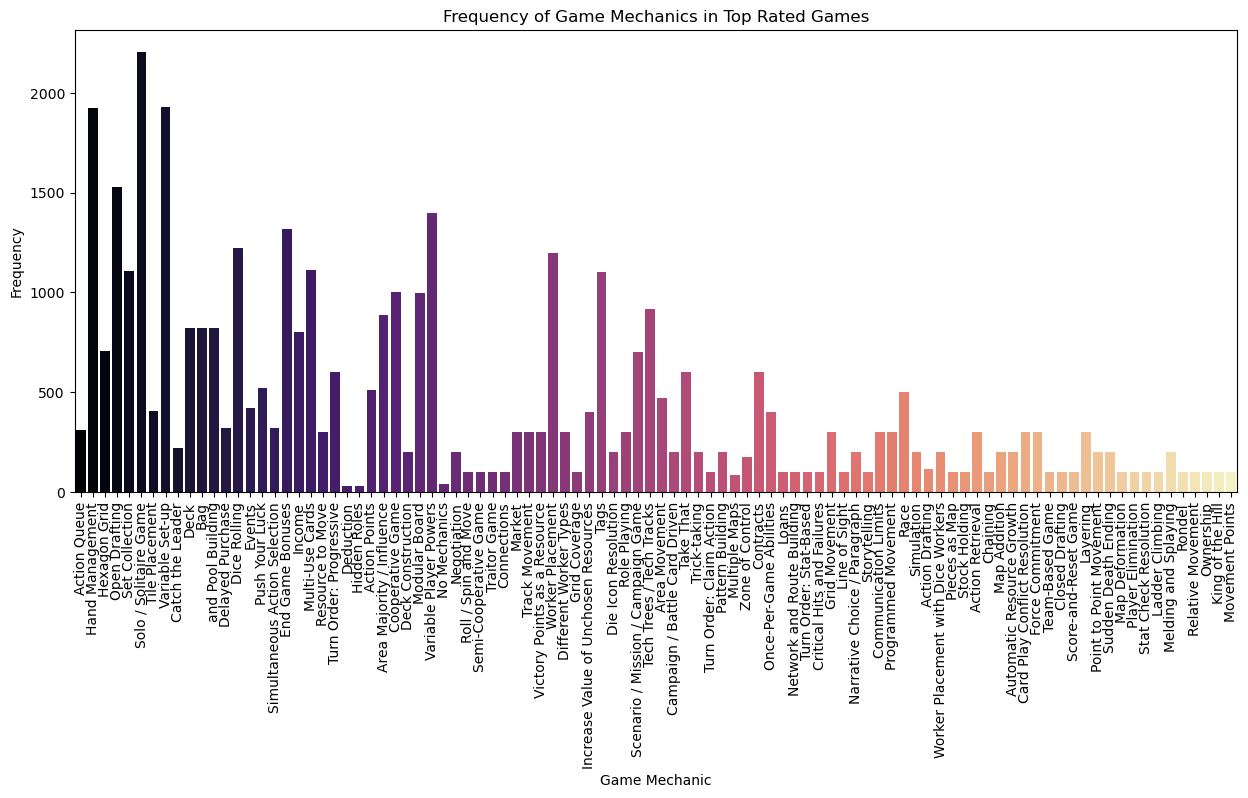

In [64]:
# Creating a new column for visualization
df['mechanics_split'] = df['mechanics'].str.split(',')
# Creating separate rows
df_exploded = df.explode('mechanics_split')
# Removing white space
df_exploded['mechanics_split'] = df_exploded['mechanics_split'].str.strip()

# Configuring Plot
plt.figure(figsize=(15,6))
sns.countplot(data=df_exploded, x='mechanics_split', palette='magma')
plt.title('Frequency of Game Mechanics in Top Rated Games')
plt.xlabel('Game Mechanic')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Top 10 Mechanics in Top Rated Games

In [57]:
top_10_mechanics = df_exploded['mechanics_split'].value_counts().nlargest(10)
print(top_10_mechanics)

mechanics_split
Solo / Solitaire Game     2204
Variable Set-up           1928
Hand Management           1924
Open Drafting             1526
Variable Player Powers    1399
End Game Bonuses          1318
Dice Rolling              1221
Worker Placement          1198
Multi-Use Cards           1110
Set Collection            1107
Name: count, dtype: int64


### Top 10 Popular Games by Top Mechanics

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/2019845318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_games.index, y=top_games.values, palette='coolwarm')


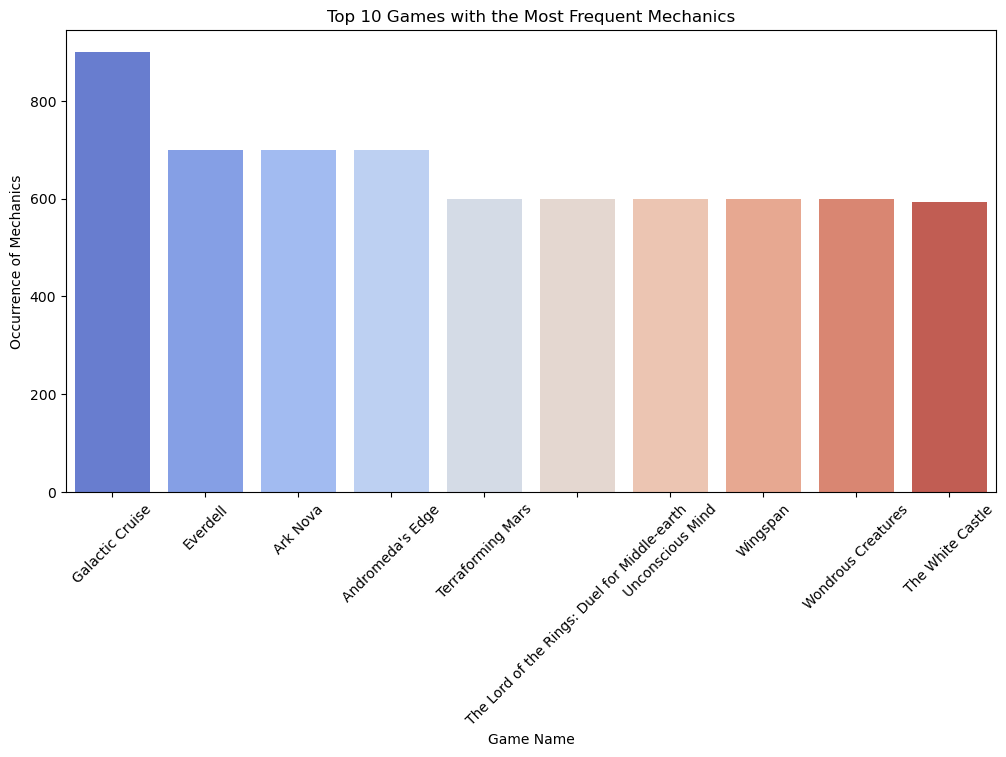

In [70]:
# Popular mechanics
top_10_mechanics = df_exploded['mechanics_split'].value_counts().nlargest(10)

# Filtering rows with the top 10 mechanics outlined
df_top_mechanics = df_exploded[df_exploded['mechanics_split'].isin(top_10_mechanics.index)]

# Grouping game name and top 10 mechanics
top_games = df_top_mechanics['gamename'].value_counts().nlargest(10)

# Configuring Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_games.index, y=top_games.values, palette='coolwarm')
plt.title('Top 10 Games with the Most Frequent Mechanics')
plt.xlabel('Game Name')
plt.ylabel('Occurrence of Mechanics')
plt.xticks(rotation=45)
plt.show()

### Investigate distribution by Category

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/695974477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_exploded_category, x='category_split', palette='magma')


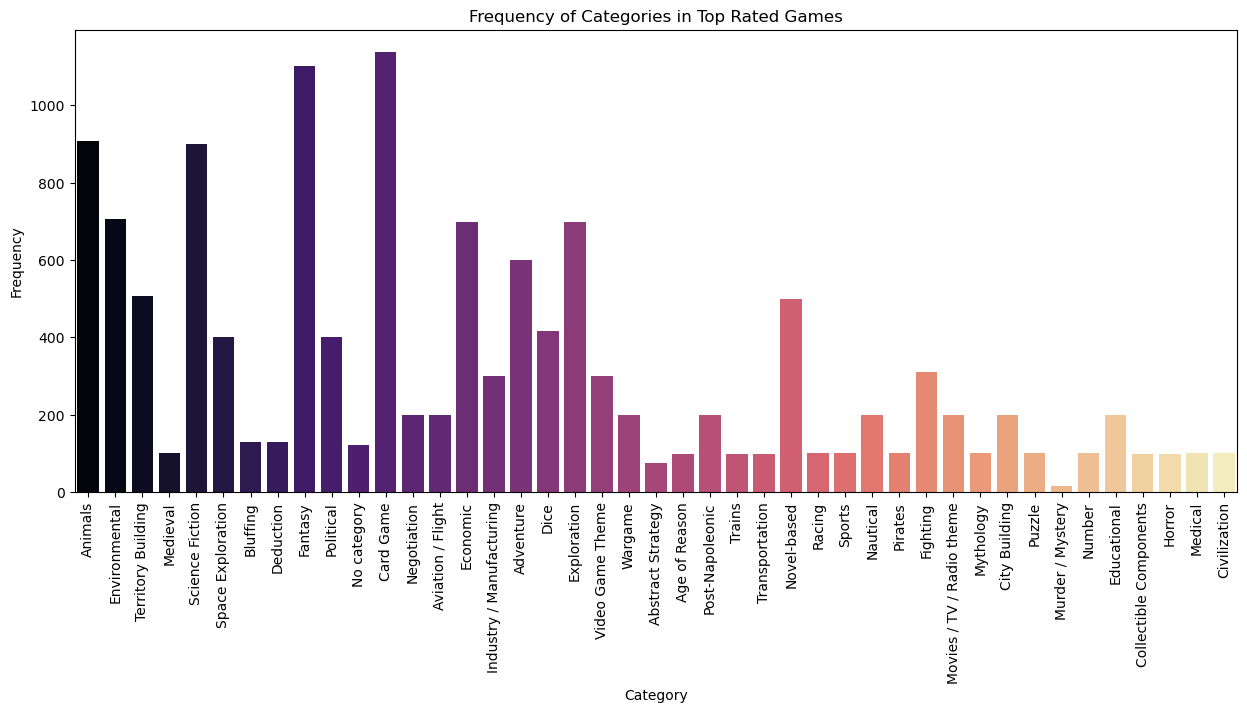

In [89]:
# Splitting category columnby ','
df['category_split'] = df['categories'].str.split(',')

# Making separate rows for categories
df_exploded_category = df.explode('category_split')

# Removing white space
df_exploded_category['category_split'] = df_exploded_category['category_split'].str.strip()

# Configuring Plot
plt.figure(figsize=(15,6))
sns.countplot(data=df_exploded_category, x='category_split', palette='magma')
plt.title('Frequency of Categories in Top Rated Games')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Top 10 Categories in Top Rated Games

In [86]:
top_10_categories = df_exploded_category['category_split'].value_counts().nlargest(10)
print(top_10_categories)

category_split
Card Game             1138
Fantasy               1101
Animals                908
Science Fiction        900
Environmental          706
Exploration            698
Economic               698
Adventure              601
Territory Building     508
Novel-based            499
Name: count, dtype: int64


### Top 10 Popular Games by Categories

/var/folders/jk/x7s9xmyx44s3sx745m_03blc0000gn/T/ipykernel_16289/1699810159.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_category_games.index, y=top_category_games.values, palette='coolwarm')


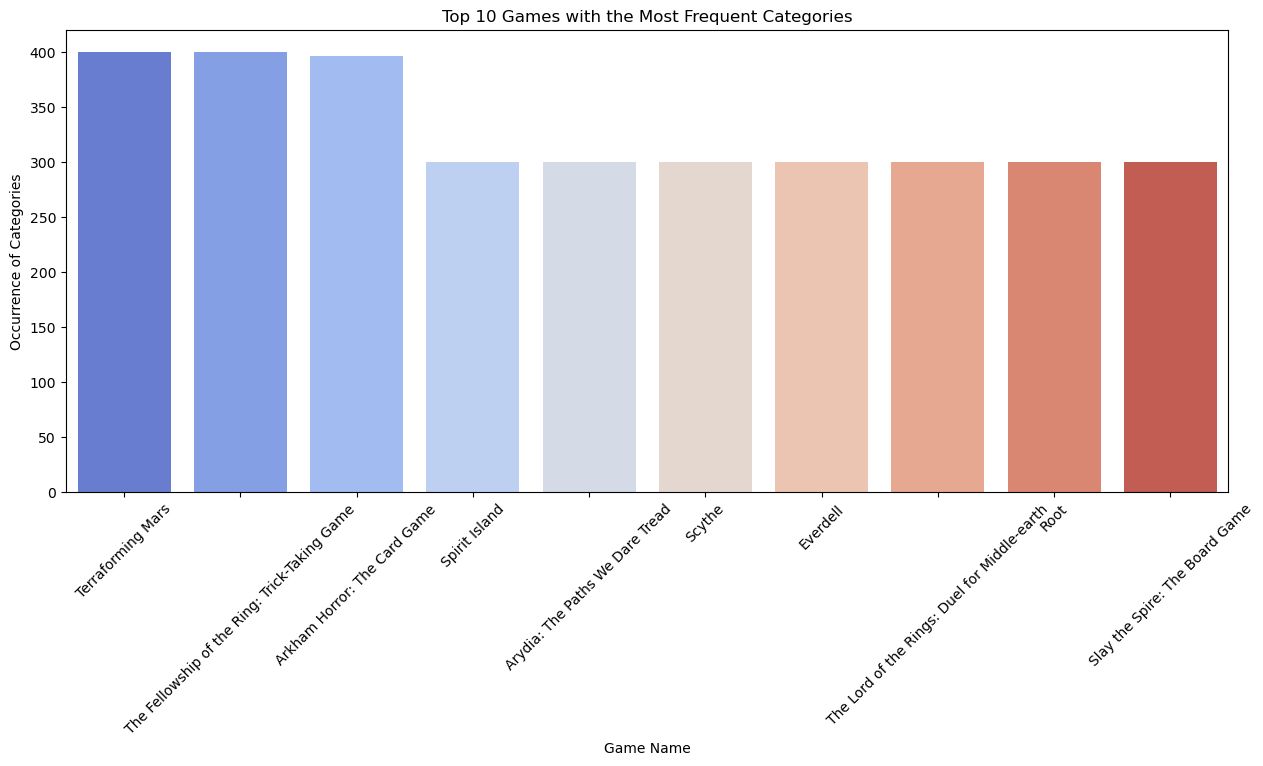

In [93]:
# Popular categories
top_10_categories = df_exploded_category['category_split'].value_counts().nlargest(10)

# Filtering rows with the top 10 categories outlined
df_top_categories = df_exploded_category[df_exploded_category['category_split'].isin(top_10_categories.index)]

# Grouping game name and top 10 categories
top_category_games = df_top_categories['gamename'].value_counts().nlargest(10)

# Configuring Plot
plt.figure(figsize=(15,6))
sns.barplot(x=top_category_games.index, y=top_category_games.values, palette='coolwarm')
plt.title('Top 10 Games with the Most Frequent Categories')
plt.xlabel('Game Name')
plt.ylabel('Occurrence of Categories')
plt.xticks(rotation=45)
plt.show()

#### Initial Conclusion
**Overall we can say that among these Top Rated Games, they are typically for a more mature audience that enjoys strategic gameplay involving hand management, and a variability to game setup. Most of these games are typically set in some fantastical or Sci-Fi universe which contributes to the immersion and the uniqueness of the experience. It remains to be seen how the players feel about the game on a critical level outside of a 1-10 rating. More to be explored in our comment sentiment analysis.** 